x	y
150 	 6.01999986544251 	 0.933723780519438
151 	 6.05999986454844 	 0.826311974554734
152 	 6.09999986365438 	 0.815510665652579
153 	 6.13999986276031 	 0.789893263187234
154 	 6.17999986186624 	 0.758935570556446
155 	 6.21999986097217 	 0.798990118262969
156 	 6.2599998600781 	 0.745926106252986
157 	 6.29999985918403 	 0.727920361560228
158 	 6.33999985828996 	 0.717354910415052
159 	 6.37999985739589 	 0.707460274770825
160 	 6.41999985650182 	 0.714707158602372
161 	 6.45999985560775 	 0.774209650979318
162 	 6.49999985471368 	 0.73878788407639
163 	 6.53999985381961 	 0.748320851658365
164 	 6.57999985292554 	 0.753642893425119
165 	 6.61999985203147 	 0.713539512021841
166 	 6.6599998511374 	 0.688391106379314
167 	 6.69999985024333 	 0.69113305226763
168 	 6.73999984934926 	 0.649700057264865
169 	 6.77999984845519 	 0.705728257228849
170 	 6.81999984756112 	 0.661341970153397
171 	 6.85999984666705 	 0.623156297985166
172 	 6.89999984577298 	 0.625867782165686
173 	 6.939

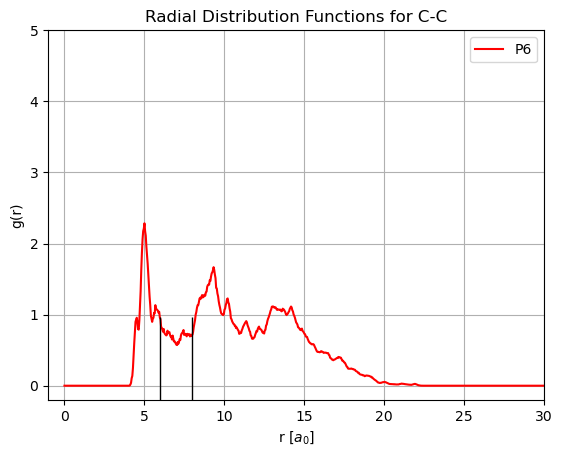

In [2]:
import matplotlib.pyplot as plt
from scipy import integrate
import math

###### MODIFY THIS BIT
pressure = 6
pair = '221' #pairs = ['111','121', '131', '221', '231','331']
###############

cell_lengths = [33.7316000000000, 32.0000000000000, 30.0000000000000, 28.4944116841394, 28.0563780094177, 26.8879850364710]
volume = cell_lengths[pressure-1] ** 3

if pair[1] == '1':
    no_of_atoms = 192
elif pair[1] == '2':
    no_of_atoms = 64
elif pair[1] == '3':
    no_of_atoms = 128
else:
    print('SOMETHING IS WRONG WITH THE PAIR')

rho = no_of_atoms / volume

######################

def calculate_cn(x_values, y_values, index_at_min, rho):
    to_be_integrated = [y * (x**2) for y, x in zip(y_values[:index_at_min], x_values[:index_at_min])]
    integral = integrate.trapezoid(to_be_integrated, x_values[:index_at_min])
    coordination_number = 4 * math.pi * rho * integral
    print('The coordination number is ' + str(coordination_number))

def find_min(lower_index, upper_index, x_values, y_values):
    plt.plot(x_values[lower_index],0, marker = '|', color = 'black', markersize = 100)
    plt.plot(x_values[upper_index],0, marker = '|', color = 'black', markersize = 100)
    min_index = None
    if upper_index - lower_index <= 50:
        print('x\ty')
        for index, values in enumerate(zip(x_values[lower_index:upper_index],y_values[lower_index:upper_index])):
            print(index+lower_index, '\t', values[0], '\t', values[1])
        lowest_value = min(y_values[lower_index:upper_index])
        for index, values in enumerate(zip(x_values[lower_index:upper_index],y_values[lower_index:upper_index])):
            if values[1] == lowest_value:
                print('The first minimum is at index ' + str(index+lower_index) + ' with x = ' + str(values[0]) + ' and y = ' + str(values[1])+'.')
                min_index = index + lower_index
                break
    return min_index

#######

parent_directory = 'D:/MSc/summer_project/'
directory = 'D:/MSc/summer_project/p' + str(pressure)
file_path = directory + '/rdf.out' + pair + '.txt'
with open(file_path, 'r') as file:
    data = file.readlines()
    x_values = []
    y_values = []
    for line in data:
        x, y = map(float, line.split())
        x_values.append(x)
        y_values.append(y)
        
label = 'P' + str(pressure)
colour = 'red'
plt.plot(x_values, y_values, label = label, color = colour)

plt.legend()
plt.xlim(-1,30)
plt.ylim(-0.2,5)
plt.xlabel('r [$a_0$]')
plt.ylabel('g(r)')
plt.grid(True)

title_label = ''
for character in pair[:-1]:
    if character == '1':
        title_label += 'O-'
    elif character == '2':
        title_label += 'C-'
    elif character == '3':
        title_label += 'Na-'
    else:
        print('Invalid character:', character)
        break
title_label = title_label[:-1]
plt.title('Radial Distribution Functions for ' + title_label)

#####

lower_index = 150
upper_index = 200
index_at_min = find_min(lower_index, upper_index, x_values, y_values)
calculate_cn(x_values, y_values, index_at_min, rho)

In [2]:
import numpy as np

#### lists of CNs at increasing pressures
cns_111 = np.array([1.9999414379173608, 1.9999778067307972, 1.9999723391922388, 1.999971981856997, 1.9999718132408373, 1.9983359447793319])
cns_121 = np.array([0.9999753224423222, 0.9999753417280246, 0.9999518940905913, 0.9999778212681218, 0.9999777743971037, 0.9999514256688805])
cns_131 = np.array([3.724816303694887, 4.166433192992824,4.587738539774322, 4.965366755333836, 4.8504937263737595, 4.873271726531595])
cns_221 = np.array([2.5135714487426055,2.4176796401745597,3.0061924291985007, 3.9681262384803864, 3.9459380894422953, 3.648468508725892])
cns_231 = np.array([8.997868584151648, 9.944903224482006, 10.54948413690671, 11.184236619476556, 10.634479039975135, 10.981998213611014])
cns_331 = np.array([8.490881358782193, 8.27541059528106, 7.368510144260339, 8.301035589149823,6.403578649128797, 7.414861363271539])

pressures_au = []

with open("d:/msc/summer_project/P_V_data.txt", "r") as file:
    # Read the first line (titles) and ignore it
    titles = file.readline()

    # Iterate through each remaining line in the file
    for line in file:
        # Split the line into columns using tab as the delimiter
        values_in_this_line = line.strip().split("\t")
        value_in_second_column = float(values_in_this_line[1])
        pressures_au.append(value_in_second_column)

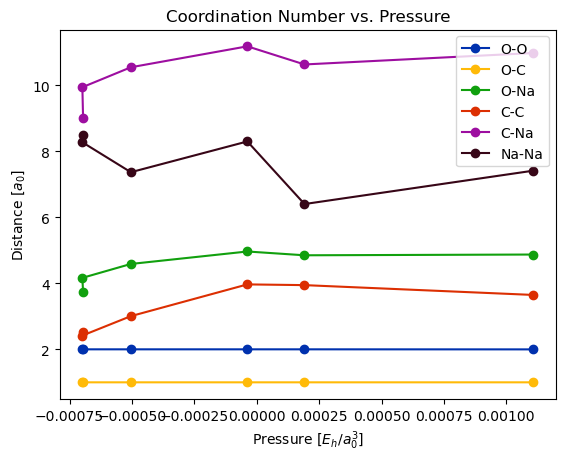

In [5]:
from matplotlib import pyplot as plt

pairs = ['111','121', '131', '221', '231','331']
all_CNs = [cns_111, cns_121, cns_131, cns_221, cns_231, cns_331]
colours = ['#0031ae', '#ffba08', '#11A00E','#dc2f02', '#9d0ea0','#370617']

for i in range(6):
    pair = pairs[i]
    CNs = all_CNs[i]

    title_label = ''
    for character in pair[:-1]:
        if character == '1':
            title_label += 'O-'
        elif character == '2':
            title_label += 'C-'
        elif character == '3':
            title_label += 'Na-'
        else:
            print('Invalid character:', character)
            break
    title_label = title_label[:-1]

    plt.plot(pressures_au, CNs, color = colours[i], marker = 'o', label = title_label)
    plt.legend()
    plt.title('Coordination Number vs. Pressure')
    plt.xlabel('Pressure [$E_h$/$a_0^{3}$]')
    plt.ylabel('Distance [$a_0$]')